## Assignment 3
## Question 2: Naive Bayes
### Name: Barun Parua
### Roll Number: 21CS10014

### Imports
Here is the list of all the libraries used in this assignment.

In [117]:
# all imports

# random module is used to generate random numbers
# matplotlib is used to plot the graph
# numpy is used to perform numerical operations
# defaultdict is used to create a dictionary with default values
# math is used to perform mathematical operations
# tabulate is used to print the table in a nice format
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math
from tabulate import tabulate

# fetch_ucirepo is used to fetch the data from the UCI repository
from ucimlrepo import fetch_ucirepo

# sklearn imports

# train_test_split is used to split the data into train and test
# accuracy_score, precision_score, recall_score, f1_score are used to calculate the accuracy, precision, recall and f1 score respectively
# standard scaler is used to scale the data for faster computation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# GaussianNB is used to implement the Gaussian Naive Bayes algorithm for the 3rd part
from sklearn.naive_bayes import GaussianNB

# roc_curve and auc are used to plot the ROC curve and calculate the area under the curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# SVC is used to implement the Support Vector Classifier for comparison with the Naive Bayes algorithm
from sklearn.svm import SVC

## Part A: Probability

### Functions
Now, for the first question, we have a biased die. So, now we evaluate the expected value of a roll of the die. We have defined functions for the same.

We have defined functions for calculating the theoretical expected value and for calculating the experimental expected value by simulating the rolls randomly.

In [118]:
# Function to assign probabilities to the faces of the die
def assign_probabilities(k):
    probs = []
    probs.append(1/(2**(k-1)))
    for i in range(2,k+1):
        probs.append(1/(2**(i-1)))
    return probs

# Function to roll the die
def roll_die(k):
    return random.choices(range(1, k + 1), weights=assign_probabilities(k))[0]

# Function to simulate the rolls
def simulate_rolls(k, num_rolls):
    results = [sum(roll_die(k) for _ in range(num_rolls)) for _ in range(1000)]
    return results

# Function to calculate the theoretical expected value
def theoretical_expected_value(k, num_rolls):
    return num_rolls * sum(i * assign_probabilities(k)[i - 1] for i in range(1, k + 1))

### k=4, 4 rolls

Now the expected value of the sum of 4 rolls of the biased die is calculated using the theoretical formula and the experimental simulation.

The theoretical expected value is 9.5 as it is 4[(1/8)*1+(1/2)*2+(1/4)*3+(1/8)*4].

It can be seen that the experimental expected value is very close to the theoretical expected value. The corresponding histogram is plotted and the five number summary is also calculated.

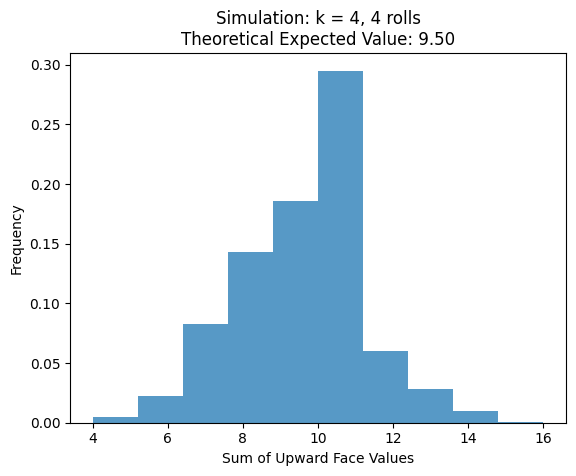

Five-number summary:
           Value
-------  -------
Minimum        4
Q1             8
Median         9
Q3            11
Maximum       16
Theoretical Expected Value: 9.50
Simulated Expected Value: 9.44


In [119]:
# Perform the simulation for k = 4 and num_rolls = 4
k = 4
num_rolls = 4
results = simulate_rolls(k, num_rolls)
expected_value = theoretical_expected_value(k, num_rolls)

# Plot a histogram
plt.hist(results, bins=10, density=True, alpha=0.75)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Simulation: k = {k}, {num_rolls} rolls\nTheoretical Expected Value: {expected_value:.2f}')
plt.show()

# Print five-number summary
print("Five-number summary:")
q1, median, q3 = np.percentile(results, [25, 50, 75])
minimum, maximum = min(results), max(results)
print(tabulate([['Minimum', minimum], ['Q1', q1], ['Median', median], ['Q3', q3], ['Maximum', maximum]], headers=['', 'Value']))

# Print the theoretical and simulated expected values
print(f"Theoretical Expected Value: {expected_value:.2f}")
print(f"Simulated Expected Value: {np.mean(results):.2f}")

### k=4, 8 rolls

Now the expected value of the sum of 8 rolls of the biased die is calculated using the theoretical formula and the experimental simulation.

The theoretical expected value is 19 as it is 8[(1/8)*1+(1/2)*2+(1/4)*3+(1/8)*4].

It can be seen that the experimental expected value is very close to the theoretical expected value. The corresponding histogram is plotted and the five number summary is also calculated.

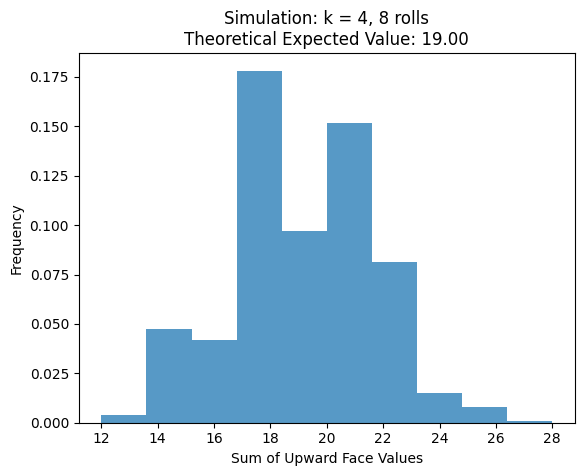

Five-number summary:
           Value
-------  -------
Minimum       12
Q1            17
Median        19
Q3            21
Maximum       28
Theoretical Expected Value: 19.00
Simulated Expected Value: 19.03


In [120]:
# Perform the simulation for k = 4 and num_rolls = 8
k = 4
num_rolls = 8
results = simulate_rolls(k, num_rolls)
expected_value = theoretical_expected_value(k, num_rolls)

# Plot a histogram
plt.hist(results, bins=10, density=True, alpha=0.75)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Simulation: k = {k}, {num_rolls} rolls\nTheoretical Expected Value: {expected_value:.2f}')
plt.show()

# Print five-number summary
print("Five-number summary:")
q1, median, q3 = np.percentile(results, [25, 50, 75])
minimum, maximum = min(results), max(results)
print(tabulate([['Minimum', minimum], ['Q1', q1], ['Median', median], ['Q3', q3], ['Maximum', maximum]], headers=['', 'Value']))

# Print the theoretical and simulated expected values
print(f"Theoretical Expected Value: {expected_value:.2f}")
print(f"Simulated Expected Value: {np.mean(results):.2f}")

### k=16, 4 rolls

Now the expected value of the sum of 4 rolls of the biased die is calculated using the theoretical formula and the experimental simulation.

The theoretical expected value is 12 as it is 4[(1/2048)*1+(1/2)*2+(1/4)*3+(1/8)*4+(1/16)*5+(1/32)*6+(1/64)*7+(1/128)*8+(1/256)*9+(1/512)*10+(1/1024)*11+(1/2048)*12].

It can be seen that the experimental expected value is very close to the theoretical expected value. The corresponding histogram is plotted and the five number summary is also calculated.

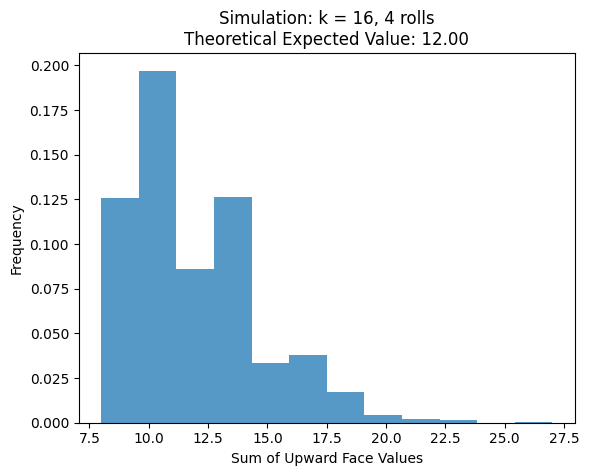

Five-number summary:
           Value
-------  -------
Minimum        8
Q1            10
Median        11
Q3            13
Maximum       27
Theoretical Expected Value: 12.00
Simulated Expected Value: 11.87


In [121]:
# Perform the simulation for k = 16 and num_rolls = 4
k = 16
num_rolls = 4
results = simulate_rolls(k, num_rolls)
expected_value = theoretical_expected_value(k, num_rolls)

# Plot a histogram
plt.hist(results, bins=12, density=True, alpha=0.75)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Simulation: k = {k}, {num_rolls} rolls\nTheoretical Expected Value: {expected_value:.2f}')
plt.show()

# Print five-number summary
print("Five-number summary:")
q1, median, q3 = np.percentile(results, [25, 50, 75])
minimum, maximum = min(results), max(results)
print(tabulate([['Minimum', minimum], ['Q1', q1], ['Median', median], ['Q3', q3], ['Maximum', maximum]], headers=['', 'Value']))

# Print the theoretical and simulated expected values
print(f"Theoretical Expected Value: {expected_value:.2f}")
print(f"Simulated Expected Value: {np.mean(results):.2f}")

## Part B: Naive Bayes from Scratch

### Data Preprocessing

Here, we fetch the spambase dataset from the UCI repository and preprocess it. Some preprocessing also has been done like converting it to np arrays, scaling the data, etc.

The data is split into training and testing data. The training data is used to train the model and the testing data is used to test the model. Finally the y array is reshaped to remove warnings while training the model.

In [122]:
# Load the dataset
spambase = fetch_ucirepo(id=94)

# data as pandas dataframe
X = spambase.data.features
y = spambase.data.targets

# convert to numpy array
X = np.array(X)
y = np.array(y)

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into train and validation and test in 70:15:15 ratio
# validation data is not used in this part
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.82, random_state=42)

# make the data in ND array form
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# X_val = np.array(X_val)
# y_val = np.array(y_val)

# change shape of y_train and y_test and y_val
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
# y_val = y_val.reshape(-1)

### Plot Distribution and Priors
As required, we plot the distribution of the features for spam and non-spam emails. We have plotted the distribution of the first 5 features. 

After this, the priors of both classes has been calculated and printed. It is simply the number of spam and non-spam emails divided by the total number of emails.

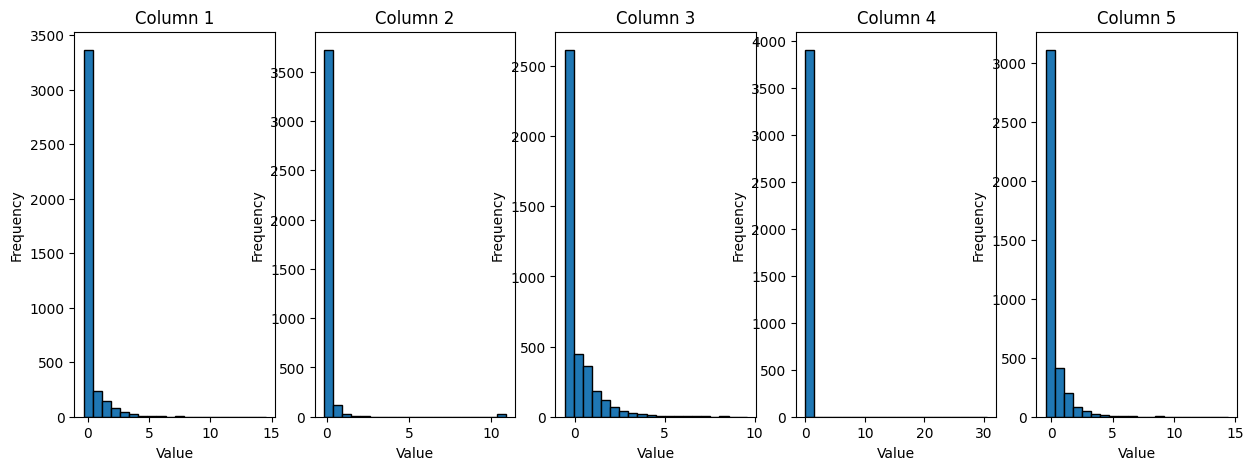

In [123]:
# the first 5 columns for demonstration
columns_to_plot = X_train[:, :5]

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.hist(columns_to_plot[:, i], bins=20, edgecolor='k')
    plt.title(f'Column {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.show()

In [124]:
# Step 4: Calculate and print the priors of classes
# Priors are the probabilities of each class in the training data
# The dataset has two classes: 0 (non-spam) and 1 (spam)
prior_0 = np.mean(y_train == 0)
prior_1 = np.mean(y_train == 1)
print(f'P(class=0) = {prior_0:.4f}')
print(f'P(class=1) = {prior_1:.4f}')

P(class=0) = 0.6141
P(class=1) = 0.3859


### Naive Bayes Classifier from Scratch

Now, we have implemented the Naive Bayes Classifier from scratch. We have defined functions for training the model, predicting the labels and calculating the accuracy. It is implemented in a OOP manner for better understanding.

In [125]:
# Naive Bayes Classifier

class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.feature_probabilities = defaultdict(list)

    def fit(self, X, y):
        # Calculate class priors
        total_samples = len(y)
        self.class_priors[0] = np.mean(y == 0)
        self.class_priors[1] = np.mean(y == 1)

        # Calculate feature probabilities for each class
        for c in [0, 1]:
            X_c = X[y == c]
            for feature in range(X.shape[1]):
                self.feature_probabilities[(c, feature)] = (X_c[:, feature].mean(), X_c[:, feature].std())

    def predict(self, X):
        predictions = []
        for sample in X:
            class_scores = {0: math.log(self.class_priors[0]), 1: math.log(self.class_priors[1])}
            for c in [0, 1]:
                for feature in range(X.shape[1]):
                    mean, std = self.feature_probabilities[(c, feature)]
                    class_scores[c] += -0.5 * ((sample[feature] - mean) / std) ** 2 - math.log(std)
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

# train the model
naive_bayes = NaiveBayesClassifier()
naive_bayes.fit(X_train, y_train)

### Evaluation of the Model

After that, we have trained the model on the training data and predicted the labels for the testing data. The accuracy of the model is calculated and printed.

In [126]:
# evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(naive_bayes, X_test, y_test)
print("Naive Bayes Classifier results:\n")
print(tabulate([['Accuracy', accuracy], ['Precision', precision], ['Recall', recall], ['F1', f1]], headers=['Metric', 'Value']))

Naive Bayes Classifier results:

Metric        Value
---------  --------
Accuracy   0.827786
Precision  0.739018
Recall     0.940789
F1         0.827786


### Log Transformation

Now, we use the log transformation and retrained the model. The accuracy of the model has increased after the log transformation, keeping all other things same.

In [127]:
# log transform the data
# log1p is used to avoid log(0) error

X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

naive_bayes_log = NaiveBayesClassifier()
naive_bayes_log.fit(X_train_log, y_train)

# Evaluation on the log-transformed dataset
accuracy_log, precision_log, recall_log, f1_log = evaluate_model(naive_bayes_log, X_test_log, y_test)
print("Naive Bayes Classifier results using Log Transformation:\n")
print(tabulate([['Accuracy', accuracy_log], ['Precision', precision_log], ['Recall', recall_log], ['F1', f1_log]], headers=['Metric', 'Value']))

Naive Bayes Classifier results using Log Transformation:

Metric        Value
---------  --------
Accuracy   0.849493
Precision  0.76738
Recall     0.944079
F1         0.846608


## Part C: Naive Bayes using sklearn

### Training the model and predicting the labels

Now, for the last part, we have used the sklearn library to train the model and predict the labels. We have used the Gaussian Naive Bayes Classifier from the sklearn library. We define two separate models for the two cases, one with log transformation and one without log transformation.

The accuracies and related parameters are calculated and printed.

In [128]:
# Create and train the Gaussian Naive Bayes model
naive_bayes_sklearn = GaussianNB()
naive_bayes_sklearn.fit(X_train, y_train)

GaussianNB()

In [129]:
# Create and train the Gaussian Naive Bayes model on log-transformed data
naive_bayes_log_sklearn = GaussianNB()
naive_bayes_log_sklearn.fit(X_train_log, y_train)

GaussianNB()

In [130]:
# Get accuracy, precision, recall, and F1 score for the sklearn model
accuracy_sklearn, precision_sklearn, recall_sklearn, f1_sklearn = evaluate_model(naive_bayes_sklearn, X_test, y_test)
print("Sklearn Naive Bayes Classifier results:\n")
print(tabulate([['Accuracy', accuracy_sklearn], ['Precision', precision_sklearn], ['Recall', recall_sklearn], ['F1', f1_sklearn]], headers=['Metric', 'Value']))
print()

# Get accuracy, precision, recall, and F1 score for the sklearn model on log-transformed data
accuracy_log_sklearn, precision_log_sklearn, recall_log_sklearn, f1_log_sklearn = evaluate_model(naive_bayes_log_sklearn, X_test_log, y_test)
print("Sklearn Naive Bayes Classifier results using Log Transformation:\n")
print(tabulate([['Accuracy', accuracy_log_sklearn], ['Precision', precision_log_sklearn], ['Recall', recall_log_sklearn], ['F1', f1_log_sklearn]], headers=['Metric', 'Value']))

Sklearn Naive Bayes Classifier results:

Metric        Value
---------  --------
Accuracy   0.827786
Precision  0.739018
Recall     0.940789
F1         0.827786

Sklearn Naive Bayes Classifier results using Log Transformation:

Metric        Value
---------  --------
Accuracy   0.849493
Precision  0.76738
Recall     0.944079
F1         0.846608


### ROC Curve and AUC

Now, we plot the ROC curve for the two models and calculate the AUC for the two models. Seeing the plots, it can be seen that the model with log transformation is better than the model without log transformation considering the higher AUC value.

The plot between the True Positive Rate and False Positive Rate is plotted for the two models.

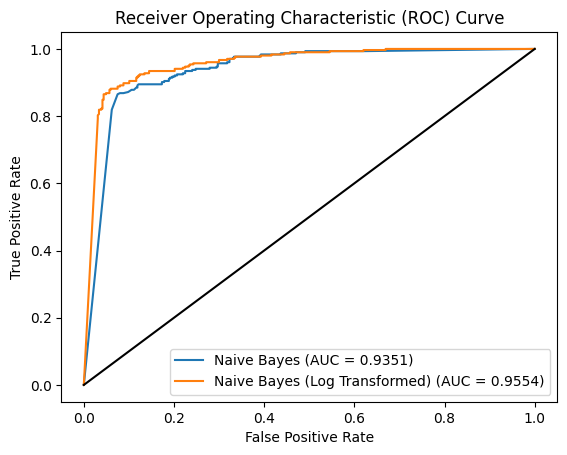

In [131]:
# Predict probabilities for the test data using both models
probs = naive_bayes_sklearn.predict_proba(X_test)[:, 1]
probs_log = naive_bayes_log_sklearn.predict_proba(X_test_log)[:, 1]

# Calculate ROC curve for both models
fpr, tpr, _ = roc_curve(y_test, probs)
fpr_log, tpr_log, _ = roc_curve(y_test, probs_log)

# Calculate AUC for both models
auc_score = auc(fpr, tpr)
auc_score_log = auc(fpr_log, tpr_log)

# Plot ROC curve for both models
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.4f})')
plt.plot(fpr_log, tpr_log, label=f'Naive Bayes (Log Transformed) (AUC = {auc_score_log:.4f})')
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Comparison with of Naive Bayes with SVM

Now, we compare the Naive Bayes Classifier with the SVM Classifier. We have used the SVM Classifier with a linear kernel. The accuracies are printed. It can be seen that while the accuracy of the SVM Classifier is higher than the Naive Bayes Classifier, the recall of the Naive Bayes Classifier is higher than the SVM Classifier. Now, it depends on the application which one to choose.

But as in the assignment theory it is given that we need that the non-spam emails should not be classified as spam, we should choose the Naive Bayes Classifier as it has a higher recall.

In [132]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the SVM model and print the accuracy, precision, recall, and F1 score
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test, y_test)
print("SVM Linear Classifier results:\n")
print(tabulate([['Accuracy', svm_accuracy], ['Precision', svm_precision], ['Recall', svm_recall], ['F1', svm_f1]], headers=['Metric', 'Value']))
print()

# Print the values for the Naive Bayes model
print("Naive Bayes Classifier results:\n")
print(tabulate([['Accuracy', accuracy], ['Precision', precision], ['Recall', recall], ['F1', f1]], headers=['Metric', 'Value']))

SVM Linear Classifier results:

Metric        Value
---------  --------
Accuracy   0.927641
Precision  0.950355
Recall     0.881579
F1         0.914676

Naive Bayes Classifier results:

Metric        Value
---------  --------
Accuracy   0.827786
Precision  0.739018
Recall     0.940789
F1         0.827786


## Conclusion

In this assignment, we have learnt about Naive Bayes Classifier and its implementation. We have also solved some theoretical questions related to probability. The concepts of ROC curve and AUC have also been discussed in the assignment.